## IMPORT LIBRARY

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

yang pertama kita harus meng import Library 
pandas untuk memproses membaca data 
Numpy untuk membaca angka 
Matplotlibpyplot untuk memvisualisasi data

## MEMBACA DATASET

In [3]:
data = pd.read_csv("GRAB.csv")
data

FileNotFoundError: [Errno 2] No such file or directory: 'GRAB.csv'

selanjutnya kita menbaca dataset pada percobaan ini saya menggunakan data set creditcard.csv

## MEMILIH DATA DARI DATASET UNTUK DIGUNAKAN SEBAGAI ATRIBUT X

In [3]:
data = data[["BALANCE", "PURCHASES"]] #Balance = x1; Purchases = x2
data.head(10)

,BALANCE,PURCHASES
0,40.900749,95.40
1,3202.467416,0.00
2,2495.148862,773.17
3,1666.670542,1499.00
4,817.714335,16.00
5,1809.828751,1333.28
6,627.260806,7091.01
7,1823.652743,436.20
8,1014.926473,861.49
9,152.225975,1281.60


## MELIHAT RINGKASAN STATISTIK

In [4]:
data.describe()

,BALANCE,PURCHASES
count,8950.000000,8950.000000
mean,1564.474828,1003.204834
std,2081.531879,2136.634782
min,0.000000,0.000000
25%,128.281915,39.635000
50%,873.385231,361.280000
75%,2054.140036,1110.130000
max,19043.138560,49039.570000


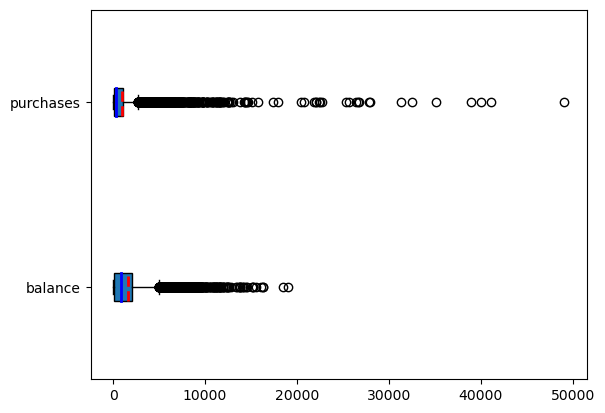

In [5]:
fig, ax = plt.subplots() #digunakan untuk membuat subplots
ax.boxplot(data,     #untuk menggambarkan penyebaran data. 
          vert = False, #box plot akan diplot secara horizontal makanya False
          showmeans = True, #Menampilkan garis mean pada box plot.
          meanline = True, #Menampilkan garis meanline pada box plot.
          labels = ("balance", "purchases"),
          patch_artist = True, #Menggambar kotak pada box plot.
          medianprops = {"linewidth" : 2, "color" : "blue"}, 
          meanprops = {"linewidth" : 2, "color" : "red"}) 
plt.show()

## BUANG OUTLIER

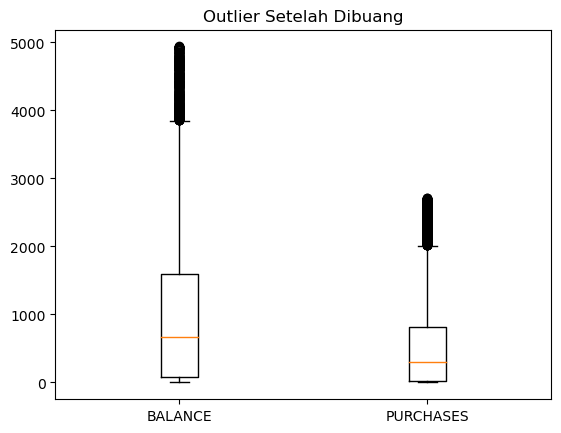

In [6]:
# Q1, Q3, dan IQR
kolom = ["BALANCE", "PURCHASES"]

Q1 = data[kolom].quantile(0.25)
Q3 = data[kolom].quantile(0.75)
IQR = Q3-Q1
data = data[~((data[kolom]<(Q1 - 1.5 * IQR)) |
             (data[kolom]>(Q3 + 1.5 * IQR))).any(axis = 1)]

plt.boxplot(data[kolom])
plt.xticks([1,2], kolom)
plt.title("Outlier Setelah Dibuang")
plt.show()

 Langkah 1: Menghitung Q1, Q3, dan IQR.
 Langkah 2: Menentukan batas bawah dan atas untuk outlier.
 Langkah 3: Menghapus data yang merupakan outlier.
#Langkah 4: Membuat box plot dari data yang telah dibersihkan.
#Pada langkah 1, fungsi data[kolom].quantile() digunakan untuk menghitung Q1, Q3, dan IQR dari data pada kolom kolom.

 Pada langkah 2, batas bawah dan atas untuk outlier ditentukan dengan menggunakan formula berikut:

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR
Pada langkah 3, data yang merupakan outlier dihapus dengan menggunakan operator ~. Operator ~ digunakan untuk membalikkan Boolean. Dalam hal ini, data yang merupakan outlier akan memiliki nilai True.
Pada langkah 4, box plot dari data yang telah dibersihkan dibuat dengan menggunakan fungsi plt.boxplot().

In [8]:
data.describe()

,BALANCE,PURCHASES
count,7590.000000,7590.000000
mean,1054.455727,542.351792
std,1173.232811,646.548508
min,0.000000,0.000000
25%,87.728941,21.225000
50%,674.399594,297.210000
75%,1593.581535,818.485000
max,4940.113918,2711.900000


data.deescribe berfungsi untuk melihat 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7590 entries, 0 to 8949
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BALANCE    7590 non-null   float64
 1   PURCHASES  7590 non-null   float64
dtypes: float64(2)
memory usage: 177.9 KB


## MEMBUAT NILAI X

In [10]:
x_array = np.array(data)

## VISUALISASI PERSEBARAN DATA

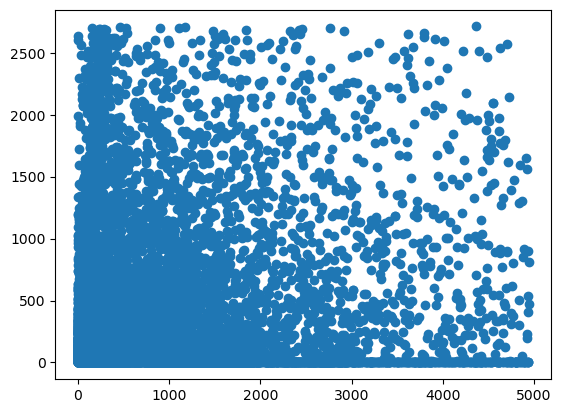

In [11]:
plt.scatter(data.BALANCE, data.PURCHASES)
plt.show()

## STANDARISASI

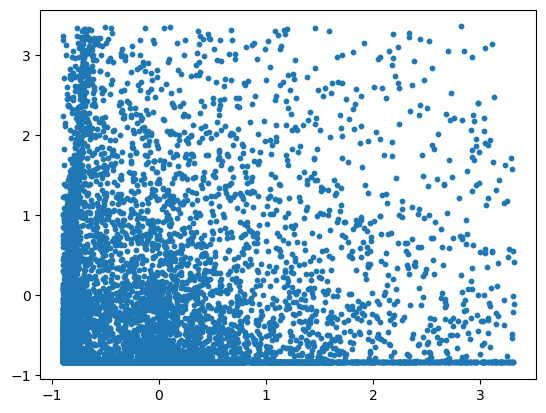

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_array)
plt.scatter(x_scaled[:,0], x_scaled[:,1], s=10)
plt.show()

 Kode tersebut digunakan untuk melakukan proses standardisasi pada data input x_array. Standardisasi adalah teknik pre-processing data yang digunakan untuk menskalakan fitur-fitur ke skala yang sama. Hal ini penting dilakukan sebelum menggunakan data untuk machine learning, karena beberapa algoritma machine learning sensitif terhadap perbedaan skala fitur.

## CEK SUM OF SQUARE ERROR DARI TIAP PEMBAGIAN JUMLAH CLUSTER

In [32]:
from sklearn.cluster import KMeans

sse = [] # sum of square error
index = range(1, 10)

for i in index:
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10) 
    kmeans.fit(x_scaled)
    sse_ = kmeans.inertia_
    sse.append(sse_)
    print(i, sse_)


1 15179.999999999993
2 9558.014597202933
3 5080.22749902957
4 3895.625015156474
5 3021.0554085049876
6 2324.7908373714904
7 1990.642216792681
8 1717.5582718412543
9 1483.9633499402853


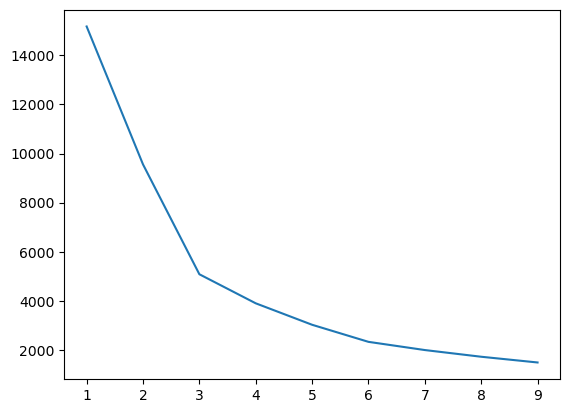

In [33]:
plt.plot(index, sse)
plt.show()

## MEMBUAT MODEL

In [53]:
kmeans = KMeans(n_clusters = 4, random_state = 1, n_init='auto')
kmeans.fit(x_scaled)

KMeans(n_clusters=4, random_state=1)

## MELIHAT CLUSTER PUSAT

In [54]:
kmeans.cluster_centers_

array([[ 1.67868055, -0.38082158],
       [-0.42235241, -0.58455494],
       [ 0.1526446 ,  2.25419386],
       [-0.48424842,  0.59981631]])

## VISUALISASI PERSEBARAN DATA SETELAH CLUSTERING

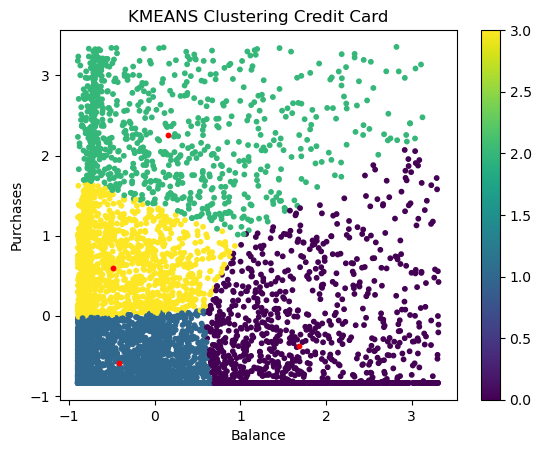

In [55]:
output = plt.scatter(x_scaled[:,0],x_scaled[:,1], s=10, c = kmeans.labels_) #datanya

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="red", s=10) #centroid
plt.title("KMEANS Clustering Credit Card")
plt.xlabel("Balance")
plt.ylabel("Purchases")
plt.colorbar(output)
plt.show()

## EVALUASI MODEL

In [56]:
from sklearn.metrics import davies_bouldin_score
labels = kmeans.labels_
davies_bouldin_score(x_scaled, labels)

0.8423903166204378

Mengecek akurasi Model apabila nilai diatas 70 maka akurasi baik apabila akurasi di bawah 70 maka akurasi kurang baik